<a href="https://colab.research.google.com/github/ktktmahmut/Melanoma/blob/main/EfficientEpo32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
!pip install -U efficientnet
import sys
import os
from os.path import join
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import efficientnet.keras as efn 
import tensorflow as tf
# import tensorflow_addons as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
from keras.preprocessing.image import load_img, img_to_array
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

     |████████████████████████████████| 50 kB 4.3 MB/s 


In [ ]:
PATH = "/gdrive/My Drive/DermMel/"
print(os.listdir(PATH))

['train_sep', 'valid', 'test', 'model.hdf5', 'best_model.hdf5']


In [ ]:
PATHtrain = PATH + 'train_sep/'
print(len(os.listdir(PATHtrain)), " TRAIN Directories of photos")
Labels = os.listdir(PATHtrain)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHtrain + label +'/')))
    sig = sig + len(os.listdir(PATHtrain + label +'/'))

print("Total TRAIN photos ", sig)
print("_"*50)

PATHvalid = PATH + 'valid/'
print(len(os.listdir(PATHvalid)), " VALID Directories of photos")
Labels = os.listdir(PATHvalid)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHvalid + label +'/')))
    sig = sig + len(os.listdir(PATHvalid + label +'/'))

print("Total Validation photos ", sig)
print("_"*50)

PATHtest = PATH + 'test/'
print(len(os.listdir(PATHtest)), " TEST Directories of photos")
Labels = os.listdir(PATHtest)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHtest + label +'/')))
    sig = sig + len(os.listdir(PATHtest + label +'/'))

print("Total Testing photos ", sig)
print("_"*50)

2  TRAIN Directories of photos
Melanoma 5341
NotMelanoma 5341
Total TRAIN photos  10682
__________________________________________________
2  VALID Directories of photos
Melanoma 1781
NotMelanoma 1782
Total Validation photos  3563
__________________________________________________
2  TEST Directories of photos
Melanoma 1781
NotMelanoma 1780
Total Testing photos  3561
__________________________________________________


TRAIN  Melanoma  photo number  77


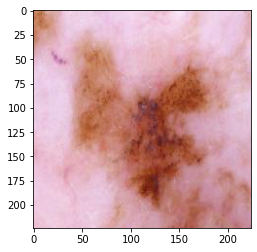

VALID  Melanoma  photo number  77


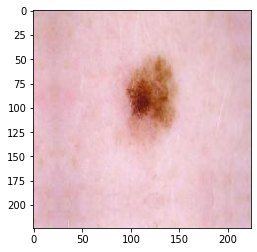

TEST  Melanoma  photo number  77


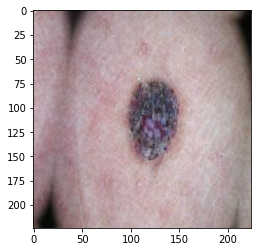

In [ ]:
TestNum = 77
diag = 'Melanoma'

image_dir = PATHtrain +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TRAIN ",diag," photo number ", TestNum)
plt.show()

image_dir = PATHvalid +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("VALID ",diag," photo number ", TestNum)
plt.show()

image_dir = PATHtest +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TEST ",diag," photo number ", TestNum)
plt.show()

In [ ]:
from efficientnet.tfkeras import EfficientNetB4

In [ ]:
from tensorflow.keras.optimizers import schedules

In [ ]:
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint,LearningRateScheduler
from keras.layers import Conv2D,BatchNormalization,MaxPool2D,Flatten,Dense
from keras.regularizers import l2
from tensorflow.keras.optimizers import schedules
from tensorflow import keras
from tensorflow.keras import models
#from tensorflow_addons.optimizers import schedules
EP=90
LR=0.0001
DR=LR/EP
MM=0.8
K=0.2

"lr=0.0001"
"--USING THIS--"
def lr_scheduler(epoch, lr):return lr* float((np.exp(- (epoch*DR))))
    
LRD=LearningRateScheduler(lr_scheduler)

callbacks_list=[LRD]



"--NOT USING THIS--"
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=DR)




"-- KEEP THIS IN MIND--"
#This line below give error because a non sense reason 
#OPT=keras.optimizers.Adam(lr=lr_schedule,decy_rate=DR)

"--CORRECT WAY WITH LEARNING RATE SCHEDULE--"
OPT=keras.optimizers.Adam(learning_rate=LR)


model = keras.Sequential()
model.add(EfficientNetB4(input_shape=(224, 224, 3), include_top=False, weights='imagenet'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation='relu',kernel_regularizer=l2(0.05), bias_regularizer=l2(0.05)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(2, activation='sigmoid')) 

# monitor
early_stopping_monitor = EarlyStopping(patience=100,monitor='val_accuracy')
model_checkpoint_callback = ModelCheckpoint(filepath='/gdrive/My Drive/chkpoint/',
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            mode='auto',
                                            save_best_only=True,
                                            verbose=1)


#categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=OPT, metrics=['accuracy', 'AUC'])

71901184/71892840 [==============================] - 3s 0us/step


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b4 (Functional  (None, 7, 7, 1792)       17673816  
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 7, 1792)        0         
                                                                 
 global_average_pooling2d (G  (None, 1792)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1792)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
train_dir = PATHtrain
validation_dir = PATHvalid
test_dir = PATHtest
target_size=(112, 112)
batch_size=96
#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=target_size,batch_size=batch_size,shuffle=True,seed=42)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=target_size,batch_size=batch_size,shuffle=True,seed=42)
test_generator = test_datagen.flow_from_directory(
    test_dir,target_size=target_size,batch_size=1)

Found 10682 images belonging to 2 classes.
Found 3563 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

{'Melanoma': 0, 'NotMelanoma': 1}
{'Melanoma': 0, 'NotMelanoma': 1}
{'Melanoma': 0, 'NotMelanoma': 1}


In [ ]:
history = model.fit(train_generator, epochs=32, 
                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                    validation_data=validation_generator, 
                    validation_steps=validation_generator.n//validation_generator.batch_size,
                    callbacks=[early_stopping_monitor,model_checkpoint_callback, LRD])

Epoch 1/32
111/111 [==============================] - ETA: 0s - loss: 19.6944 - accuracy: 0.7135 - auc: 0.7510 
Epoch 1: val_accuracy improved from -inf to 0.61064, saving model to /gdrive/My Drive/chkpoint/
111/111 [==============================] - 2842s 25s/step - loss: 19.6944 - accuracy: 0.7135 - auc: 0.7510 - val_loss: 16.5541 - val_accuracy: 0.6106 - val_auc: 0.6786 - lr: 1.0000e-04
Epoch 2/32
111/111 [==============================] - ETA: 0s - loss: 13.7770 - accuracy: 0.8307 - auc: 0.8801
Epoch 2: val_accuracy improved from 0.61064 to 0.72691, saving model to /gdrive/My Drive/chkpoint/
111/111 [==============================] - 152s 1s/step - loss: 13.7770 - accuracy: 0.8307 - auc: 0.8801 - val_loss: 11.7026 - val_accuracy: 0.7269 - val_auc: 0.8132 - lr: 1.0000e-04
Epoch 3/32
111/111 [==============================] - ETA: 0s - loss: 9.6610 - accuracy: 0.8616 - auc: 0.9143
Epoch 3: val_accuracy improved from 0.72691 to 0.77280, saving model to /gdrive/My Drive/chkpoint/
111/1

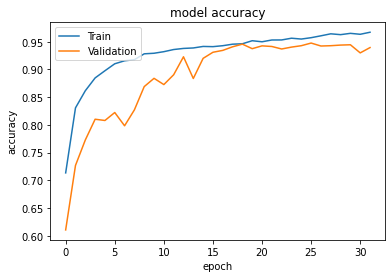

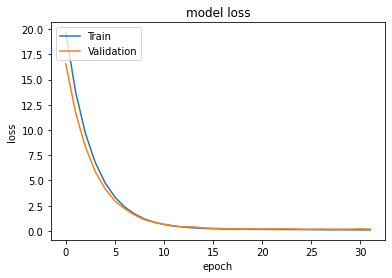

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from keras.models import load_model

model.save('/gdrive/My Drive/chkpoint/EfficientEpo32_96_batch.h5')  


In [ ]:
test_acc = model.evaluate_generator(test_generator, steps= 3561 // batch_size, verbose=1)
print('test acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


37/37 [==============================] - 14s 342ms/step - loss: 0.1036 - accuracy: 0.9730 - auc: 0.9949
test acc: [0.1035512238740921, 0.9729729890823364, 0.9948868155479431]


In [ ]:
y=np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])
true_labels=np.argmax(y, axis=-1)

prediction= model.predict(test_generator, verbose=2)
prediction=np.argmax(prediction, axis=-1)

3561/3561 - 71s - 71s/epoch - 20ms/step


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [ ]:
cm_plot_labels = ['melanoma','not melanoma']

Confusion matrix, without normalization
[[1670  111]
 [ 110 1670]]
Accuracy: 0.938
Precision: 0.938
Recall: 0.938
F-Measure: 0.938


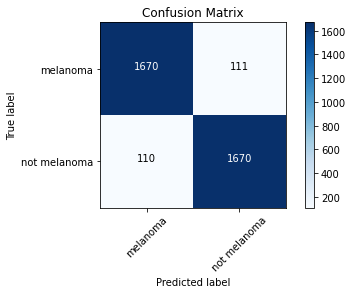

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='binary')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='binary')
print('F-Measure: %.3f' % score)